# 1.sigmoid函数

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

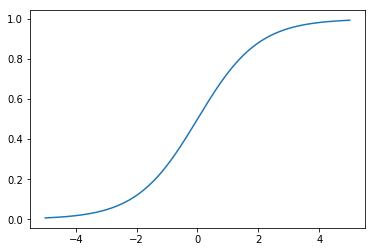

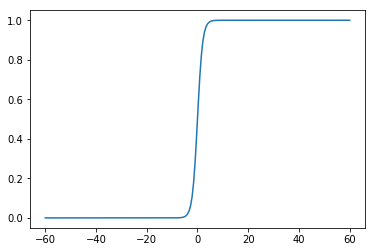

In [2]:
x = np.linspace(-5,5,200)
y = [1/(1+math.e**(-x)) for x in x]
plt.plot(x,y)
plt.show()

x = np.linspace(-60,60,200)
y = [1/(1+math.e**(-x)) for x in x]
plt.plot(x,y)
plt.show()
        

# 2.LR的损失函数

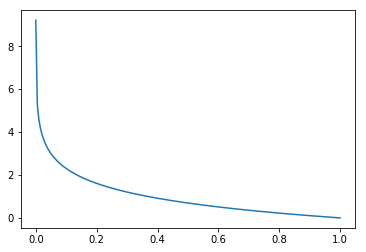

In [3]:
x = np.linspace(0.0001,1,200)
y = [(-np.log(x)) for x in x]
plt.plot(x,y)
plt.show()

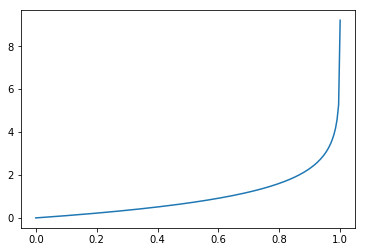

In [4]:
x = np.linspace(0,0.9999,200)
y = [(-np.log(1-x)) for x in x]
plt.plot(x,y)
plt.show()

# 3.使用梯度下降求解逻辑回归

1. 使用BGD求解逻辑回归

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataSet = pd.read_table('testSet.txt', header = None)
dataSet.columns = ['X1','X2','labels']
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [6]:
dataSet.shape

(100, 3)

In [7]:
dataSet['labels'].value_counts()

1    53
0    47
Name: labels, dtype: int64

可视化

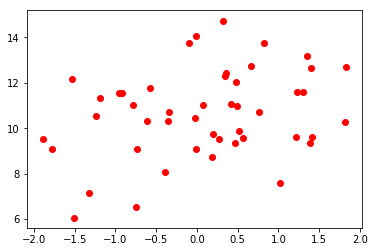

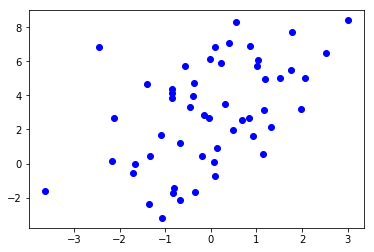

In [8]:
plt.figure()
plt.scatter(dataSet[dataSet['labels'] == 0]['X1'],dataSet[dataSet['labels'] == 0]
['X2'],c ='red')
plt.figure()
plt.scatter(dataSet[dataSet['labels'] == 1]['X1'],dataSet[dataSet['labels'] == 1]
['X2'],c ='blue')
plt.show()

定义辅助函数

In [9]:
"""
函数功能：计算sigmoid函数值
参数说明：
        inx：数值型数据
返回：
    s: 经过sigmoi函数计算后的函数值
"""
def sigmoid(inx):
    s = 1/(1+np.exp(-inx))
    return s

标准化函数

In [10]:
"""
函数功能：标准化（期望为0，方差为1）
参数说明：
        xMat:特征矩阵
返回：
        inMat:标准化之后的特征矩阵
"""
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat, axis =0)
    inVar = np.std(inMat,axis = 0)
    inMat = (inMat - inMeans)/inVar
    return inMat

BGD算法python实现

In [11]:
"""
函数功能：使用BGD求解逻辑回归
参数说明：
        dataSet:DF数据集
        alpha：步长
        maxCycles:最大迭代次数
返回：
        weights: 各个特征权重值
"""
def BGD_LR(dataSet, alpha = 0.001, maxCycles = 500):
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m,n  = xMat.shape
    weights = np.zeros((n,1))
    for i in range(maxCycles):
        grad = xMat.T*(xMat * weights-yMat)/m
        weights = weights - alpha * grad
    return weights

In [12]:
ws = BGD_LR(dataSet,alpha = 0.01, maxCycles = 500)
xMat = np.mat(dataSet.iloc[:, :-1].values)
yMat = np.mat(dataSet.iloc[:,-1].values).T
xMat = regularize(xMat)
(xMat * ws).A.flatten()

array([-0.70915655,  0.06316312, -0.06083467, -0.16569736, -0.39005307,
       -0.01533216, -0.52906893, -0.23235356, -0.23599289, -0.36795332,
        0.03505109, -0.51406386,  0.41592948, -0.38697784,  0.02891359,
        0.54454538,  0.03555741,  0.36098043,  0.55969558,  0.15852275,
        0.47646723,  0.53101892, -0.54065346,  0.74759682,  0.19088669,
       -0.18717433, -0.30080371,  0.47069011,  0.31141881, -0.17291747,
        0.20972955, -0.11876328, -0.37433484,  0.73381939,  0.24921037,
       -0.25972227, -0.22372825, -0.43778658, -0.65400415, -0.54645619,
        0.27011361,  0.12772377, -0.40661688,  0.66087998,  0.43357637,
       -0.47906407,  0.76585452,  0.07811623, -0.55111417, -0.37854252,
       -0.18960068, -0.38543731, -0.17502127, -0.6093852 ,  0.2676083 ,
       -0.01876525, -0.42140155,  0.03674238, -0.54819343,  0.14006896,
        0.16000859,  0.4732384 , -0.23883563, -0.52699542, -0.51238534,
        0.68934636,  0.21517432, -0.37032942, -0.47870378, -0.48

In [13]:
p = sigmoid(xMat * ws).A.flatten()
for i ,j in enumerate(p):
    if j < 0.5:
        p[i] = 0
    else:
        p[i] = 1

In [14]:
train_error = (np.fabs(yMat.A.flatten()-p)).sum()
train_error_rate = train_error/yMat.shape[0]
train_error_rate

0.04

准确率计算函数

In [15]:
"""
函数功能：计算准确率
参数说明：
        dataSet:DF数据集
        method：计算权重函数
        alpha: 步长
        maxCycles:最大迭代次数
返回：
        trainAcc：模型预测准确度
"""
def logisticAcc(dataSet, method, alpha = 0.01, maxCycles =500):
    weights = method(dataSet, alpha = alpha, maxCycles = maxCycles)
    p = sigmoid(xMat * ws).A.flatten()
    for i ,j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    train_error = (np.fabs(yMat.A.flatten() - p)).sum()
    trainAcc = 1 - train_error / yMat.shape[0]
    return trainAcc

In [16]:
logisticAcc(dataSet, BGD_LR, alpha = 0.01, maxCycles =500)

0.96

2.SGD随机梯度下降

In [17]:
"""
函数功能：使用SGD求解逻辑回归
参数说明：
         dataSet:DF数据集
         alpha：步长
         maxCycles: 最大迭代次数
返回：
        weights: 个特征权重值
"""
def SGD_LR(dataSet, alpha = 0.001, maxCycles = 500):
    dataSet = dataSet.sample(maxCycles, replace = True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (xMat[i] * weights - yMat[i])
        weights = weights - alpha * grad
    return weights

# 3.从疝气病症预测病马死亡率

In [22]:
train = pd.read_table('horseColicTraining.txt',header = None)
train.head()
train.shape

(299, 22)

In [23]:
test = pd.read_table('horseColictest.txt',header = None)
test.head()
test.shape

(67, 22)

In [25]:
"""
函数功能：给定测试数据和权重，返回标签类别
参数说明：
        inx:测试数据
        weights：特征权重
"""
def classify(inx, weights):
    p = sigmoid(sum(inx * weights))
    if p < 0.5:
        return 0
    else:
        return 1

In [28]:
"""
函数功能：logistic 分类模型
参数说明：
        train:训练集
        test：测试集
        alpha: 步长
        maxCycles:最大迭代次数
返回：
        retest:预测好标签的测试集
"""
def get_acc(train, test, alpha = 0.001, maxCycles = 5000):
    weights = SGD_LR(train, alpha = alpha, maxCycles = maxCycles)
    xMat = np.mat(test.iloc[:, :-1].values)
    xMat = regularize(xMat)
    result = []
    for inx in xMat:
        label = classify(inx, weights)
        result.append(label)
    retest = test.copy()
    retest['predict'] = result
    acc = (retest.iloc[:,-1] == retest.iloc[:,-2]).mean()
    print(f'模型准确度为{acc}')
    return retest

In [29]:
get_acc(train, test, alpha = 0.001, maxCycles = 5000)

模型准确度为0.7164179104477612


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,predict
0,2,1,38.5,54,20,0,1,2,2,3,...,2,5.9,0,2,42.0,6.3,0,0.0,1,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0.0,0,0,44.0,6.3,1,5.0,1,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,0.0,3,5,45.0,70.0,3,2.0,1,0
3,1,1,37.0,56,24,3,1,4,2,4,...,1,0.0,0,0,35.0,61.0,3,2.0,0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0.0,0,2,37.0,5.8,0,0.0,1,1
5,1,1,0.0,60,40,3,0,1,1,0,...,2,0.0,0,5,42.0,72.0,0,0.0,1,1
6,2,1,38.4,80,60,3,2,2,1,3,...,2,0.0,1,1,54.0,6.9,0,0.0,1,1
7,2,1,37.8,48,12,2,1,2,1,3,...,0,0.0,2,0,48.0,7.3,1,0.0,1,1
8,2,1,37.9,45,36,3,3,3,2,2,...,1,0.0,3,0,33.0,5.7,3,0.0,1,1
9,2,1,39.0,84,12,3,1,5,1,2,...,2,7.0,0,4,62.0,5.9,2,2.2,0,0
